In [1]:
import pandas as pd  
print('hello')
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

hello


In [3]:
dataset = pd.read_csv('weather.csv') # read the data 

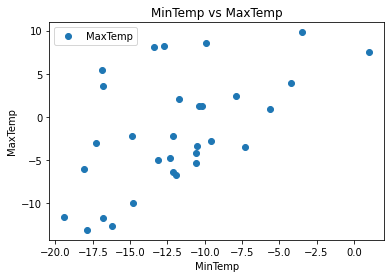

In [4]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [5]:
dataset.describe()



,Year,Month,Day,MaxTemp,Max Temp Flag,MinTemp,Min Temp Flag,MeanTemp,Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Spd of Max Gust Flag
count,31.0,31.0,31.000000,31.000000,0.0,31.000000,0.0,31.000000,0.0,31.000000,0.0,31.0,0.0,30.000000,30.000000,30.000000,27.000000,0.0,0.0,0.0
mean,2015.0,1.0,16.000000,-1.658065,NaN,-11.861290,NaN,-6.787097,NaN,24.787097,NaN,0.0,NaN,2.740000,1.973333,4.713333,4.703704,NaN,NaN,NaN
std,0.0,0.0,9.092121,6.616483,NaN,4.712443,NaN,5.021802,NaN,5.021802,NaN,0.0,NaN,7.754002,3.457220,8.751699,5.157629,NaN,NaN,NaN
min,2015.0,1.0,1.000000,-13.100000,NaN,-19.400000,NaN,-15.500000,NaN,13.700000,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2015.0,1.0,8.500000,-5.650000,NaN,-15.550000,NaN,-9.300000,NaN,21.650000,NaN,0.0,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
50%,2015.0,1.0,16.000000,-2.800000,NaN,-12.100000,NaN,-7.000000,NaN,25.000000,NaN,0.0,NaN,0.000000,0.200000,0.700000,2.000000,NaN,NaN,NaN
75%,2015.0,1.0,23.500000,3.000000,NaN,-10.050000,NaN,-3.650000,NaN,27.300000,NaN,0.0,NaN,0.750000,2.550000,5.550000,8.000000,NaN,NaN,NaN
max,2015.0,1.0,31.000000,9.800000,NaN,1.000000,NaN,4.300000,NaN,33.500000,NaN,0.0,NaN,35.000000,13.000000,37.400000,17.000000,NaN,NaN,NaN


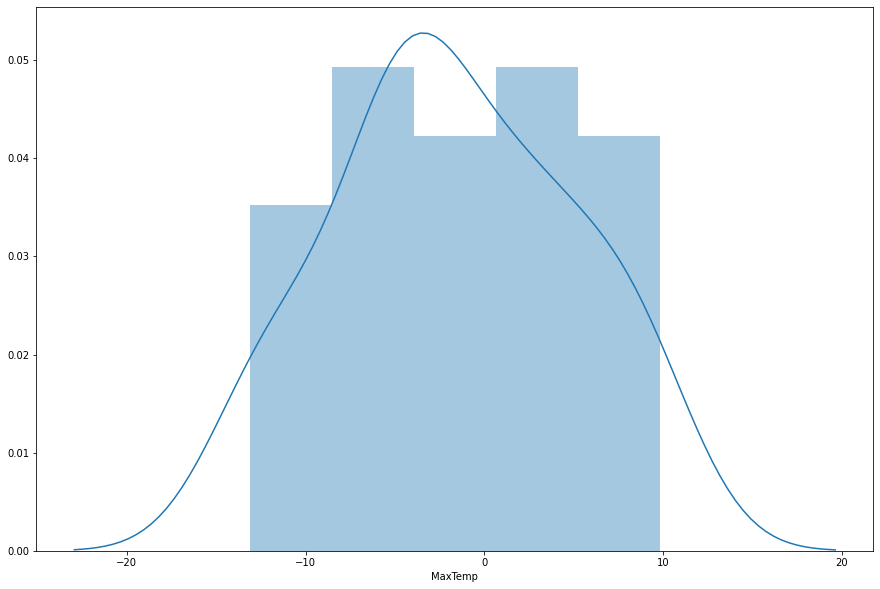

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [7]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [ ]:
## Separate training and test data 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[8.84946435]
[[0.8136391]]


In [11]:
y_pred = regressor.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,-10.0,-3.192394
1,-2.8,1.038529
2,-6.0,-5.877403
3,-4.2,0.224890
4,1.3,0.387618
5,-6.7,-0.832841
6,-3.5,2.909899


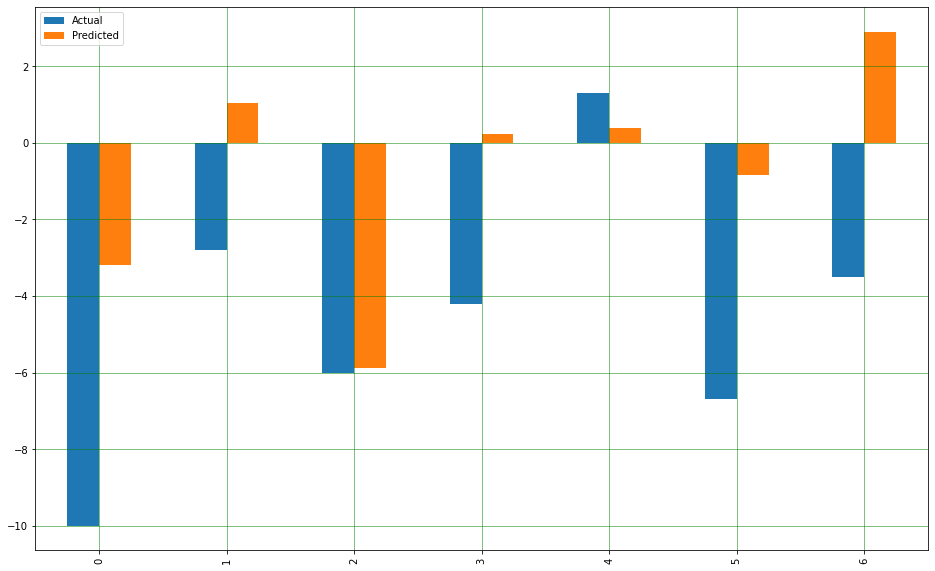

In [13]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

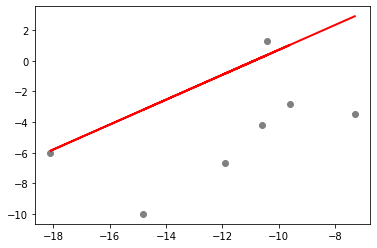

In [14]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.054723037762231
Mean Squared Error: 22.430754204354788
Root Mean Squared Error: 4.736111717892093
